In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import pylab as plt
from statannot import add_stat_annotation

from importlib import reload
import itertools
from itertools import count

import sys

sys.path.insert(1,'../../make_figures')
import plots

In [2]:
data_path = '/scratch/c.c21013066/data/ukbiobank'

# Baseline info: verbal interview on drugs

In [3]:
# load drugs
drugs = pd.read_csv(f'{data_path}/phenotypes/AntiParkinsonism.csv')
drugs2 = pd.read_csv(f'{data_path}/phenotypes/Dopa.csv')

drugs = pd.merge(drugs,drugs2,on='eid')

In [4]:
cases = pd.read_csv(f'{data_path}/sample/withGP/noOsteo/ParkinsonDisease.csv')
cases['ParkinsonDisease'] = 1
cases['time_to_diagnosis'] = cases['ParkinsonDisease_age'] - cases['visit_age']

cases2 = pd.read_csv(f'{data_path}/sample/withGP/noOsteo/AllCauseParkinsonism.csv')
cases2['AllCauseParkinsonism'] = 1
cases2['time_to_diagnosis_AllCauseParkinsonism'] = cases2['AllCauseParkinsonism_age'] - cases2['visit_age']

In [5]:
m = pd.merge(cases,drugs,on='eid',how='outer')
m.loc[m['ParkinsonDisease']!=1,'ParkinsonDisease'] = 0
m = pd.merge(cases2,m,on='eid',how='outer')
m.loc[m['AllCauseParkinsonism']!=1,'AllCauseParkinsonism'] = 0

In [3]:
3837/100*15.95

612.0015

In [9]:
m.groupby(['AllCauseParkinsonism','ParkinsonDisease'])[['antiparkinsonism','Dopa']].agg(['size','mean','sum'])

antiparkinsonism                   Dopa  \
                                                  size      mean  sum    size   
AllCauseParkinsonism ParkinsonDisease                                           
0.0                  0.0                        498105  0.001548  771  498105   
1.0                  0.0                           471  0.031847   15     471   
                     1.0                          3837  0.217357  834    3837   

                                                      
                                           mean  sum  
AllCauseParkinsonism ParkinsonDisease                 
0.0                  0.0               0.000062   31  
1.0                  0.0               0.004246    2  
                     1.0               0.159500  612

In [8]:
m.groupby('antiparkinsonism')['visit_age_x','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std'])

/tmp/ipykernel_177592/2678334873.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m.groupby('antiparkinsonism')['visit_age_x','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std'])


visit_age_x                   ParkinsonDisease_age          \
                        mean    size       std                 mean    size   
antiparkinsonism                                                              
0                  62.973301  500793  5.839913            69.802484  500793   
1                  62.682404    1620  5.542165            57.998777    1620   

                           time_to_diagnosis                    
                       std              mean    size       std  
antiparkinsonism                                                
0                 7.593545          6.450776  500793  4.816832  
1                 7.748063         -4.736875    1620  5.979556

# GP prescription

In [32]:
gp = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_raw.csv',parse_dates=['issue_date'])
gp['treated'] = 'True'
gp_first = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_first.csv',parse_dates=['gp_AntiParkinsonism_date'])

In [37]:
gp

,eid,data_provider,issue_date,read_2,bnf_code,dmd_code,drug_name,quantity,event_dt,treated
0,1030610,2,2013-01-05,dq3b.,4090100.0,NaN,Co-careldopa 25mg/100mg modified-release tablets,56.0,2013-01-05,True
1,1030610,2,2014-02-10,dq35.,4090100.0,NaN,Co-careldopa 12.5mg/50mg tablets,480.0,2014-02-10,True
2,1030610,2,2016-03-02,dq27.,4090100.0,NaN,Co-beneldopa 12.5mg/50mg capsules,28.0,2016-03-02,True
3,1030610,2,2016-03-02,dq35.,4090100.0,NaN,Co-careldopa 12.5mg/50mg tablets,224.0,2016-03-02,True
4,1030610,2,2016-03-02,dqEs.,4090100.0,NaN,Pramipexole 2.1mg modified-release tablets,28.0,2016-03-02,True
...,...,...,...,...,...,...,...,...,...,...
31126,6018205,4,2007-03-13,dqA1.,NaN,NaN,NaN,NaN,2007-03-13,True
31127,6018205,4,2007-05-15,dqA1.,NaN,NaN,NaN,NaN,2007-05-15,True
31128,6018205,4,2007-04-17,dqA1.,NaN,NaN,NaN,NaN,2007-04-17,True
31129,6018205,4,2007-06-19,dqA1.,NaN,NaN,NaN,NaN,2007-06-19,True


In [33]:
m = pd.merge(cases,gp_first,on='eid',how='outer')
m.loc[m['ParkinsonDisease']!=1,'ParkinsonDisease'] = 0
#m = pd.merge(cases2,m,on='eid',how='outer',suffixes=['_allcausepd',''])
#m.loc[m['AllCauseParkinsonism']!=1,'AllCauseParkinsonism'] = 0
#m.loc[m['gp_AntiParkinsonism'].isna(),'gp_AntiParkinsonism'] = 0

In [7]:
(3837-2045)/100*11.4955, 100/3837*206, 3837-206-1586

(205.99936000000002, 5.368777690904352, 2045)

In [36]:
m.groupby(['ParkinsonDisease'])[['gp_AntiParkinsonism']].agg(['size',np.mean,'sum',lambda x: x.isna().sum()])

gp_AntiParkinsonism                            
                                size      mean    sum <lambda_0>
ParkinsonDisease                                                
0.0                           220267  0.001394  307.0        0.0
1.0                             3837  0.114955  206.0     2045.0

In [64]:
(100/cases.shape[0])*206

5.368777690904352

In [16]:
m[m['ParkinsonDisease']==1].groupby('gp_AntiParkinsonism')['visit_age','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std','min','max'])

/tmp/ipykernel_177592/1559448955.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m[m['ParkinsonDisease']==1].groupby('gp_AntiParkinsonism')['visit_age','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std','min','max'])


visit_age                                        \
                          mean  size       std        min        max   
gp_AntiParkinsonism                                                    
0.0                  62.975676  1586  5.622892  40.931710  70.542174   
1.0                  62.610936   206  5.341436  47.891469  70.057564   

                    ParkinsonDisease_age                             \
                                    mean  size       std        min   
gp_AntiParkinsonism                                                   
0.0                            66.302958  1586  9.294786   7.819462   
1.0                            64.047293   206  7.883289  42.297925   

                               time_to_diagnosis                             \
                           max              mean  size       std        min   
gp_AntiParkinsonism                                                           
0.0                  82.994175          3.319540  1586  6.889322 -38.056907   
1.0                  78.290451          1.436357   206  5.821971 -20.564420   

                                
                           max  
gp_AntiParkinsonism             
0.0                  13.563591  
1.0                   9.552558

In [18]:
m.groupby(['antiparkinsonism','gp_AntiParkinsonism']).size()

KeyError: 'antiparkinsonism'

<AxesSubplot:xlabel='issue_date', ylabel='quantity'>

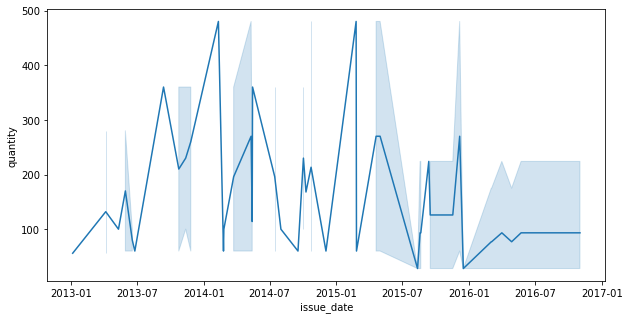

In [17]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x='issue_date',y='quantity',data=gp[gp['eid']==1030610])

# Analysis whether medication has effect on acceleration

In [9]:
# used during accelerometry?
data_raw = pd.read_csv(f'{data_path}/phenotypes/accelerometer/unmatched_all_HCnoOsteo.csv',parse_dates=['date_accelerometry'])
res = pd.read_csv(f'{data_path}/phenotypes/accelerometer/unmatched_all_residual_BMI_HCnoOsteo_intercept.csv')
acc = pd.read_csv(f'{data_path}/phenotypes/demo_acc.csv',parse_dates=['date_accelerometry','date_visit'])
data = pd.merge(data_raw,acc[['eid','date_visit','date_accelerometry']],on='eid',how='outer',suffixes=['_drop',''])
gp = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_raw.csv',parse_dates=['issue_date'],dayfirst=True)
gp['treated'] = 'True'
gp_first = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_first.csv',parse_dates=['gp_AntiParkinsonism_date'])
data = pd.merge(data,res[['eid','average acceleration residual_bmi']],on='eid',how='left')
data = pd.merge(data,gp_first[['eid','gp_AntiParkinsonism']],on='eid',how='left')
# cases = pd.read_csv(f'{data_path}/sample/withGP/noOsteo/ParkinsonDisease.csv')
# cases['ParkinsonDisease'] = 1
# cases['time_to_diagnosis'] = cases['ParkinsonDisease_age'] - cases['visit_age']
# data = pd.merge(data,cases[['eid','ParkinsonDisease']],on='eid',how='left')
data = data.dropna(subset=['date_accelerometry'])

In [10]:
# get closest date to acc_date
data = data.sort_values('date_accelerometry')
gp = gp.sort_values('issue_date')
accm = pd.merge_asof(data,gp,by='eid',left_on='date_accelerometry',right_on='issue_date',tolerance=pd.Timedelta(weeks=10),direction='backward')

accm.loc[np.logical_and(accm['treated'].isna(),~accm['gp_AntiParkinsonism'].isna()),'treated'] = 'False'
accm.loc[np.logical_and(accm['treated'].isna(),accm['gp_AntiParkinsonism'].isna()),'treated'] = 'None'

In [11]:
accm['acc_time_since_medication'] = accm['date_accelerometry'] - accm['issue_date']
accm['acc_time_to_medication'] = accm['issue_date'] - accm['date_accelerometry']

accm['acc_time_since_medication_days'] = (accm['date_accelerometry'] - accm['issue_date']) / pd.Timedelta(days=1)
accm['acc_time_to_medication_days'] = (accm['issue_date'] - accm['date_accelerometry']) / pd.Timedelta(days=1)

In [12]:
accm_back = accm.groupby(['diagnosis','eid']).first() # for when direction == backward
#accm_first = accm.groupby(['diagnosis','eid']).first() # for when direction == nearest

In [13]:
accm_back.filter(regex='acc_time').describe()

,acc_time_since_diagnosis,acc_time_to_diagnosis,acc_time_since_medication,acc_time_to_medication,acc_time_since_medication_days,acc_time_to_medication_days
count,66707.000000,66707.000000,40,40,40.000000,40.000000
mean,-0.027415,0.027415,18 days 03:24:00,-19 days +20:36:00,18.141667,-18.141667
std,11.319766,11.319766,11 days 18:11:50.324328344,11 days 18:11:50.324328344,11.758221,11.758221
min,-7.747136,-72.468063,3 days 10:00:00,-51 days +14:00:00,3.416667,-50.416667
25%,-6.558884,-4.125798,5 days 10:00:00,-28 days +14:00:00,5.416667,-27.416667
50%,-5.781319,5.781319,17 days 22:00:00,-18 days +02:00:00,17.916667,-17.916667
75%,4.125798,6.558884,27 days 10:00:00,-6 days +14:00:00,27.416667,-5.416667
max,72.468063,7.747136,50 days 10:00:00,-4 days +14:00:00,50.416667,-3.416667


In [262]:
difference = np.setdiff1d(accm_first[~accm_first['acc_time_since_medication'].isna()].index,accm_back[~accm_back['acc_time_since_medication'].isna()].index)

In [263]:
accm_first.loc[difference].filter(regex='date'),accm_first.loc[difference].groupby('diagnosis')[['acc_time_to_medication_days']].agg(['size','count','mean','min','max','std'])

(                             date_accelerometry_drop date_visit  \
 diagnosis            eid                                          
 AllCauseDementia     4051798     2014-05-29 10:00:00 2007-11-27   
 AllCauseParkinsonism 1234565     2015-05-14 10:00:00 2007-11-13   
                      1283671     2014-06-09 10:00:00 2008-05-06   
                      1401399     2013-10-21 10:00:00 2010-05-28   
                      2515100     2013-12-02 10:00:00 2007-12-05   
                      2596024     2013-12-07 10:00:00 2007-12-04   
                      2721196     2013-06-15 10:00:00 2008-04-16   
                      4051798     2014-05-29 10:00:00 2007-11-27   
 Depression           5308371     2013-06-29 10:00:00 2008-05-31   
 Osteoarthritis       1401399     2013-10-21 10:00:00 2010-05-28   
                      3818993     2014-09-08 10:00:00 2008-02-15   
                      5091955     2013-10-16 10:00:00 2007-12-20   
                      5308371     2013-06-29 10:

In [14]:
accm
accm_back.groupby(['diagnosis','Status'])[['acc_time_since_medication_days','gp_AntiParkinsonism']].agg(['size','count','mean','std',lambda x: x.isna().sum()])

acc_time_since_medication_days        \
                                                         size count   
diagnosis            Status                                           
AllCauseDementia     Diseased                             986     0   
                     Prodromal                            383     2   
AllCauseParkinsonism Diseased                             308    13   
                     Prodromal                            211     0   
AlzheimerDisease     Diseased                              59     0   
                     Prodromal                            153     1   
Depression           Diseased                            9514     7   
                     Prodromal                             72     0   
Dystonia             Diseased                              81     1   
Healthy              Healthy                            43753     0   
Osteoarthritis       Diseased                           12305     3   
                     Prodromal                           1102     0   
ParkinsonDisease     Diseased                             273    13   
                     Prodromal                            196     0   

                                                                 \
                                     mean        std <lambda_0>   
diagnosis            Status                                       
AllCauseDementia     Diseased         NaN        NaN      986.0   
                     Prodromal  14.916667  13.435029      381.0   
AllCauseParkinsonism Diseased   15.570513   9.847556      295.0   
                     Prodromal        NaN        NaN      211.0   
AlzheimerDisease     Diseased         NaN        NaN       59.0   
                     Prodromal  24.416667        NaN      152.0   
Depression           Diseased   26.416667  14.877276     9507.0   
                     Prodromal        NaN        NaN       72.0   
Dystonia             Diseased    4.416667        NaN       80.0   
Healthy              Healthy          NaN        NaN    43753.0   
Osteoarthritis       Diseased   25.750000  15.534907    12302.0   
                     Prodromal        NaN        NaN     1102.0   
ParkinsonDisease     Diseased   15.570513   9.847556      260.0   
                     Prodromal        NaN        NaN      196.0   

                               gp_AntiParkinsonism                             \
                                              size  count      mean       std   
diagnosis            Status                                                     
AllCauseDementia     Diseased                  986    930  0.000000  0.000000   
                     Prodromal                 383    164  0.018293  0.134418   
AllCauseParkinsonism Diseased                  308    178  0.112360  0.316699   
                     Prodromal                 211     74  0.013514  0.116248   
AlzheimerDisease     Diseased                   59     42  0.000000  0.000000   
                     Prodromal                 153     64  0.015625  0.125000   
Depression           Diseased                 9514   5085  0.003343  0.057729   
                     Prodromal                  72     41  0.000000  0.000000   
Dystonia             Diseased                   81     37  0.027027  0.164399   
Healthy              Healthy                 43753  10482  0.000000  0.000000   
Osteoarthritis       Diseased                12305   6625  0.001811  0.042524   
                     Prodromal                1102    435  0.000000  0.000000   
ParkinsonDisease     Diseased                  273    151  0.125828  0.332759   
                     Prodromal                 196     66  0.015152  0.123091   

                                           
                               <lambda_0>  
diagnosis            Status                
AllCauseDementia     Diseased        56.0  
                     Prodromal      219.0  
AllCauseParkinsonism Diseased       130.0  
                     Prodromal      137.0

Text(0, 0.5, 'average acceleration')

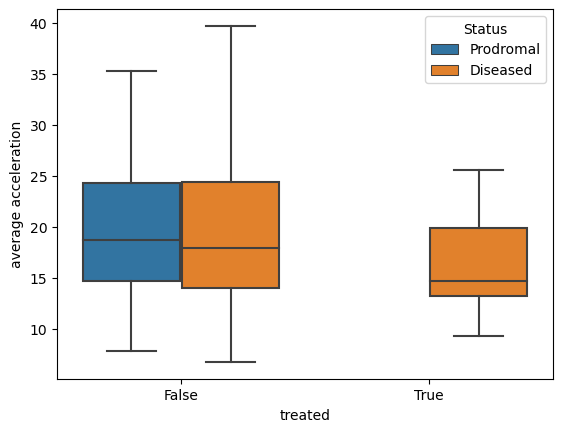

In [274]:
ax = sns.boxplot(hue='Status',x='treated',y='No_wear_time_bias_adjusted_average_acceleration',data=accm_back.loc['ParkinsonDisease'],showfliers=False)
ax.set_ylabel('average acceleration')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

False v.s. True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.770e-01 U_stat=1.101e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

False v.s. True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.770e-01 U_stat=1.101e+03


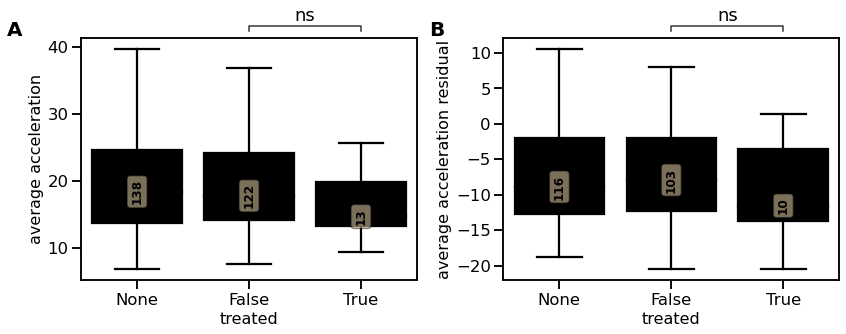

In [25]:
fig,axes = plt.subplots(ncols=2,figsize=(12,5))
plots.plot_context()
ax0 = sns.boxplot(x='treated',y='No_wear_time_bias_adjusted_average_acceleration',data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'],showfliers=False,color='k',ax=axes[0])
test_results = add_stat_annotation(ax0, data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'], x='treated', y='No_wear_time_bias_adjusted_average_acceleration',
                                   test='Mann-Whitney', text_format='star',box_pairs = [("True",'False')],
                                   loc='outside', verbose=2)
ax0.set_ylabel('average acceleration')
ax0.text(-0.22, 1.01,'A', transform=ax0.transAxes,size=20, weight='bold')
N_diagnosis = accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'].dropna(subset=['No_wear_time_bias_adjusted_average_acceleration'])['treated'].value_counts()
plots.add_median_labels(ax0,N_diagnosis,fmt="%d",remove=1)

ax1 = sns.boxplot(x='treated',y='average acceleration residual_bmi',data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'],showfliers=False,color='k',ax=axes[1])
test_results = add_stat_annotation(ax1, data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'], x='treated', y='No_wear_time_bias_adjusted_average_acceleration',
                                   test='Mann-Whitney', text_format='star',box_pairs = [("True",'False')],
                                   loc='outside', verbose=2)
ax1.set_ylabel('average acceleration residual')
ax1.text(-0.22, 1.01,'B', transform=ax1.transAxes,size=20, weight='bold')
N_diagnosis = accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'].dropna(subset=['average acceleration residual_bmi'])['treated'].value_counts()
plots.add_median_labels(ax1,N_diagnosis,fmt="%d",remove=1)
plt.tight_layout()
plt.savefig('/scratch/c.c21013066/images/paper/ProdromalUKBB/medication_acceleration_NaNtreated.png',dpi=300,bbox_inches='tight')
plt.savefig('/scratch/c.c21013066/images/paper/ProdromalUKBB/medication_acceleration_NaNtreated.pdf',dpi=300,bbox_inches='tight')